**Mount Google drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**Discriminator -1**

In [ ]:
# Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

**Loading Train Data**


In [ ]:
# Loading the attributes of face images from the csv file
df = pd.read_csv('/content/drive/MyDrive/Biometric Project/biometric.csv', dtype=str)
df.head()

image_id 5_o_Clock_Shadow  ... Wearing_Necktie Young
0  000001.jpg               -1  ...              -1     1
1  000002.jpg               -1  ...              -1     1
2  000003.jpg               -1  ...              -1     1
3  000004.jpg               -1  ...              -1     1
4  000005.jpg               -1  ...              -1     1

[5 rows x 41 columns]

In [ ]:
# Number of face images and their attributes  
df.shape

(20009, 41)

In [ ]:
# Selecting one of the attribute - Gender
print(df[['image_id','Male']].head())
print('\n')
print((df['Male'].value_counts()))                 # --- Male and Female data distribution.

     image_id Male
0  000001.jpg   -1
1  000002.jpg   -1
2  000003.jpg    1
3  000004.jpg   -1
4  000005.jpg   -1


-1    11574
1      8435
Name: Male, dtype: int64


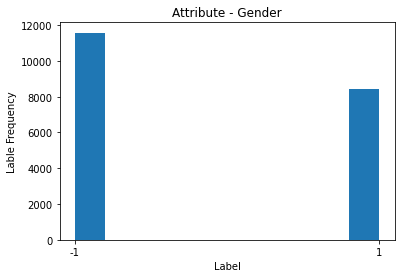

In [ ]:
# Visualization of Gender data distribution
plt.hist(df['Male'], bins = 10)
plt.xlabel('Label')
plt.ylabel('Lable Frequency')
plt.title('Attribute - Gender')
plt.show()

In [ ]:
# Loading the face images from the directory using flow frame data frame function.
datagen = ImageDataGenerator(validation_split=0.3)
train_generator = datagen.flow_from_dataframe(dataframe = df, directory = '/content/drive/MyDrive/Biometric Project/Biometric data',
                                              x_col = 'image_id', y_col = 'Male', class_mode = 'binary', target_size = (96,96),
                                              batch_size = 14007, subset='training')
validation_generator = datagen.flow_from_dataframe(dataframe = df, directory = '/content/drive/MyDrive/Biometric Project/Biometric data',
                                              x_col = 'image_id', y_col = 'Male', class_mode = 'binary', target_size = (96,96),
                                              batch_size = 6002, subset = 'validation')

Found 14007 validated image filenames belonging to 2 classes.
Found 6002 validated image filenames belonging to 2 classes.


In [ ]:
x , y = train_generator.next()       # --- Dividing the train_generator (train data) object to x and y variables, where x consists of face images and y consists of labels corresponding to them.

In [ ]:
print(x.shape)       # --- shape of x is same as the batch size provided in the above flow from data frame function.

(14007, 96, 96, 3)


In [ ]:
x1 , y1 = validation_generator.next()  # --- Dividing the validation_generator (validation data) object to x1 and y1 variables, where x1 consists of face images and y1 consists of labels corresponding to them.
print(x1.shape)

(6002, 96, 96, 3)


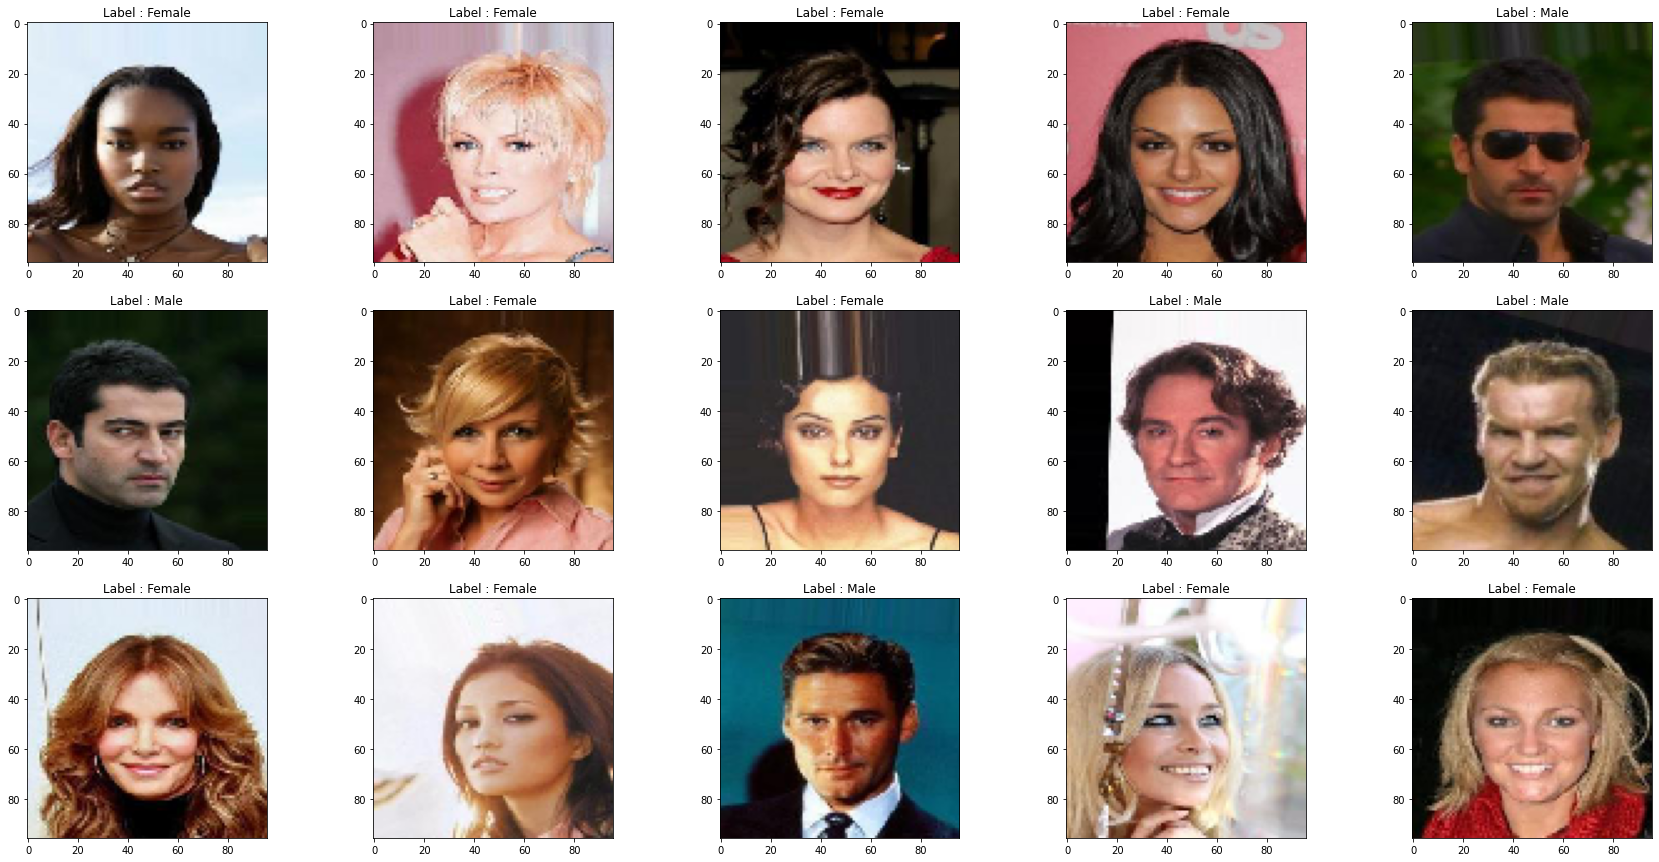

In [ ]:
def ext():                                    # --- This function returns the correct label of the face image.  
  if y[i]==1:
    return 'Male'
  else:
    return 'Female'
    
# Displaying some sample train images
plt.figure(figsize=(30,15))
for i in range(15):
  plt.subplot(3,5,i+1)
  plt.imshow(x[i].astype('uint8'))
  plt.title(f'Label : {ext()}')
plt.show()

In [ ]:
# Displaying first 5 labels of train images 
for i in range(5):
  print(y[i])                       

0.0
0.0
0.0
1.0
1.0


**Image Preprocessing ( Train and Validation)**


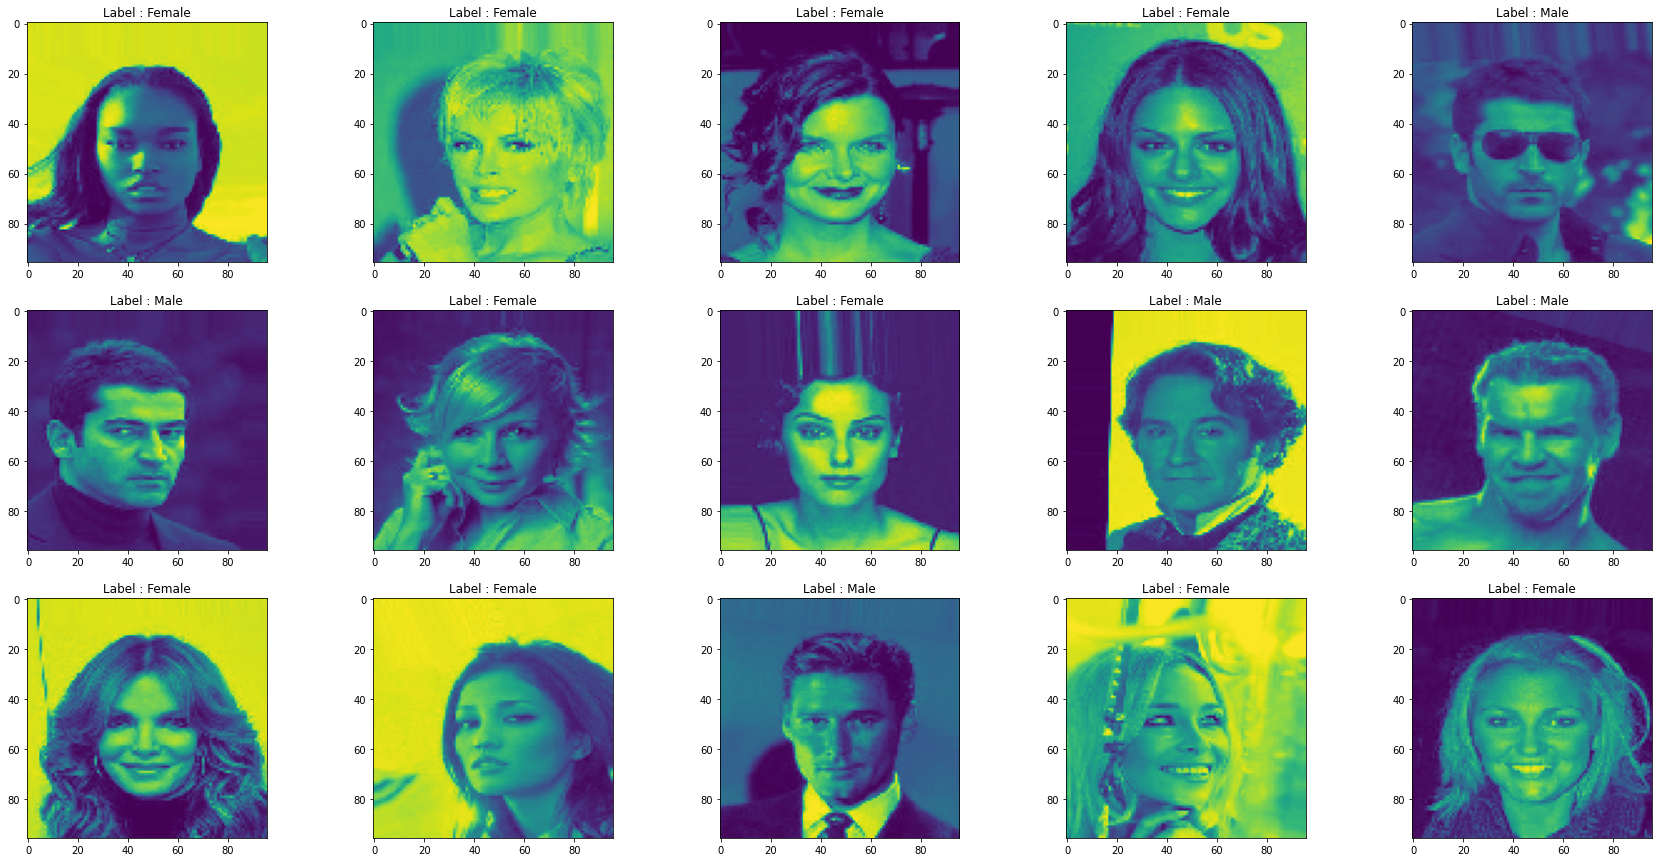

In [ ]:
# Converting the face images of training data to gray scale
x_train = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in x])

# Displaying some of the converted images
plt.figure(figsize=(30,15))
for i in range(15):
  plt.subplot(3,5,i+1)
  plt.imshow(x_train[i].astype('uint8'))
  plt.title(f'Label : {ext()}')
plt.show()

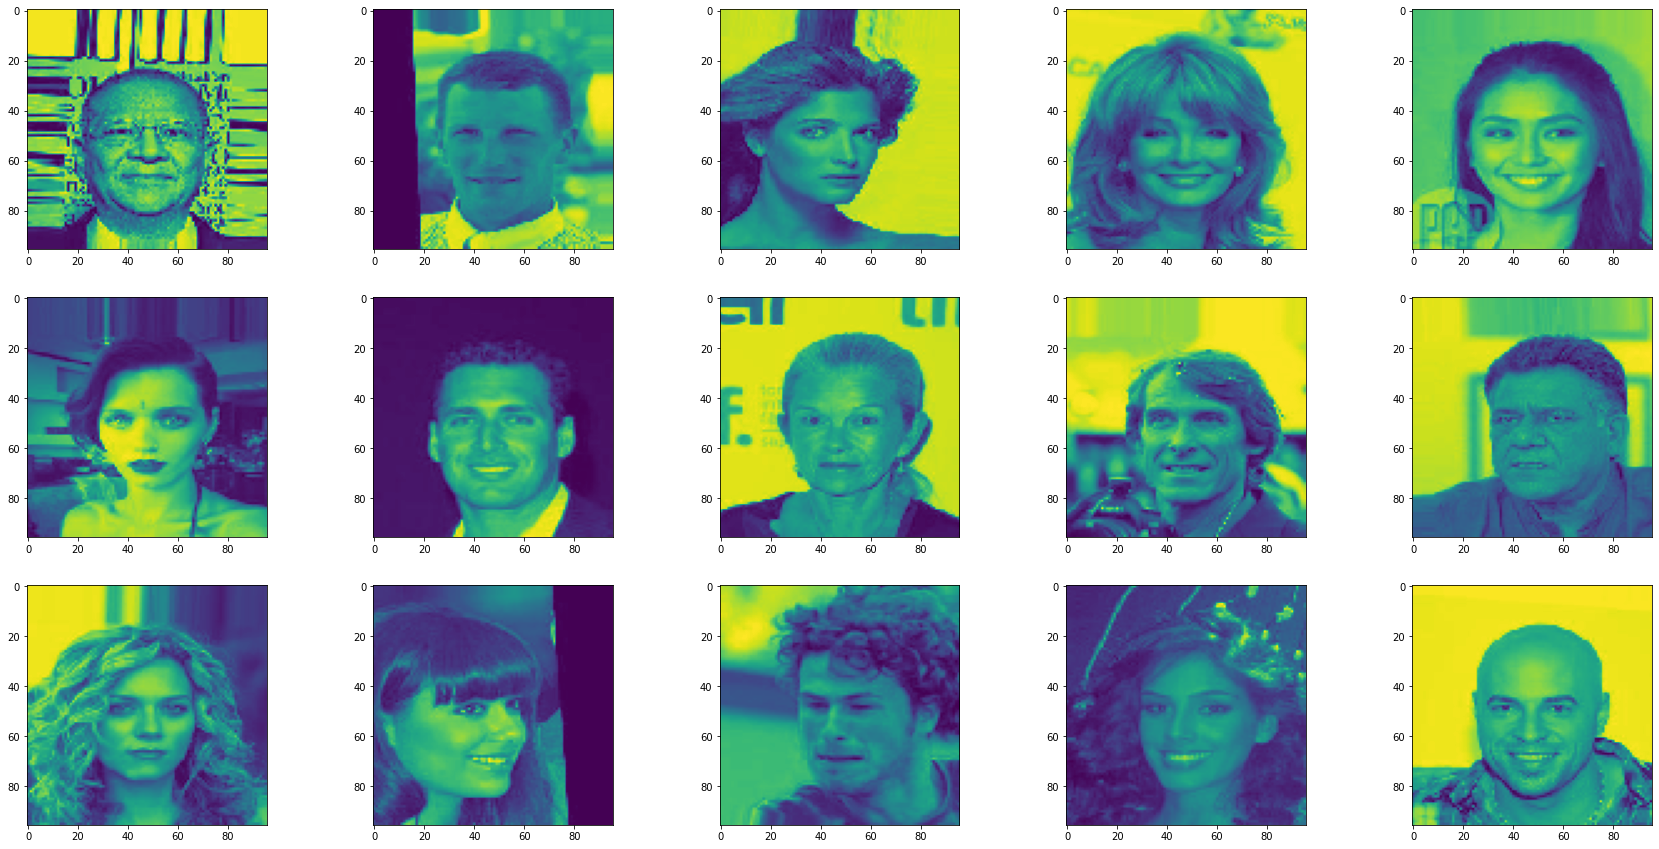

In [ ]:
# Converting the face images of validation data to gray scale
x_val = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in x1])

# Displaying some of the converted images
plt.figure(figsize=(30,15))
for i in range(15):
  plt.subplot(3,5,i+1)
  plt.imshow(x_val[i].astype('uint8'))
plt.show()

In [ ]:
# Reshaping the images to in order to fit the defined model.
x_train = x_train.reshape(14007,96,96,1)
x_val = x_val.reshape(6002,96,96,1)

**Loading Test Data**

In [ ]:
# Loading the attributes of face images (test) from the csv file
df1 = pd.read_csv('/content/drive/MyDrive/Biometric Project/test_data.csv',dtype=str)
df1.head()

image_id 5_o_Clock_Shadow  ... Wearing_Necktie Young
0  020010.jpg                1  ...              -1    -1
1  020011.jpg               -1  ...              -1    -1
2  020012.jpg               -1  ...              -1     1
3  020013.jpg               -1  ...              -1     1
4  020014.jpg               -1  ...              -1     1

[5 rows x 41 columns]

In [ ]:
print(df1.shape)                      # --- Shape of test data
print(df1['Male'].value_counts())     # --- Distribution of test data

(3003, 41)
-1    1751
1     1252
Name: Male, dtype: int64


In [ ]:
# Loading face images (for testing) from the directory.
datagen1 = ImageDataGenerator()
test_generator = datagen1.flow_from_dataframe(dataframe = df1, directory = '/content/drive/MyDrive/Biometric Project/test data',
                                              x_col = 'image_id', y_col = 'Male', class_mode = 'binary', target_size = (96,96),
                                              batch_size = 3000)

Found 3003 validated image filenames belonging to 2 classes.


In [ ]:
x2, y_test = test_generator.next() # --- Dividing the test_generator (test data) object to x2 and y_test variables, where x2 consists of face images and y_test consists of labels corresponding to them.

print(x2.shape)

(3000, 96, 96, 3)


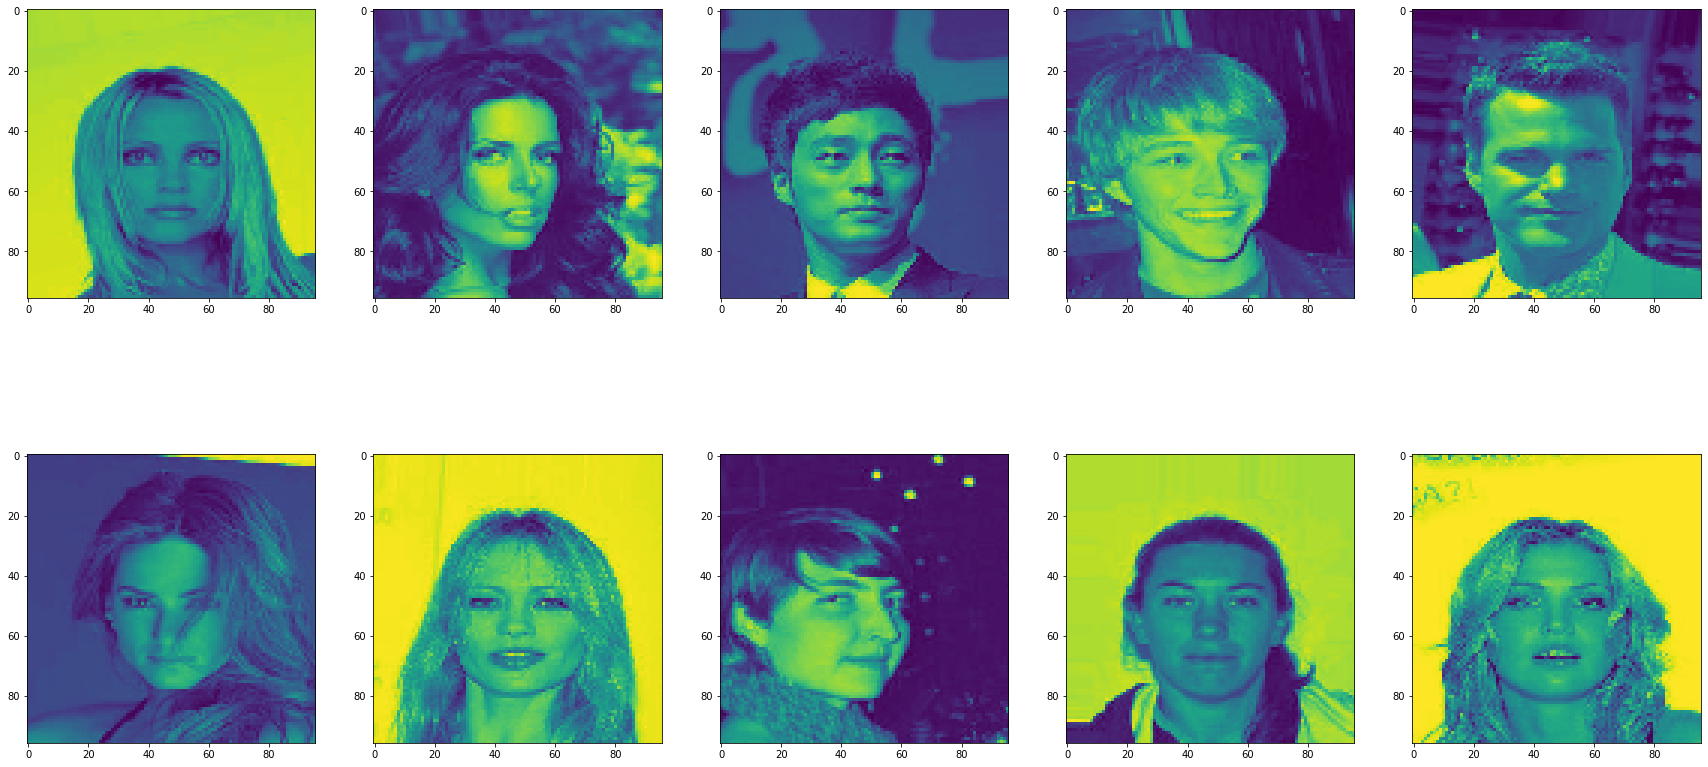

In [ ]:
# Converting the face images of test data to gray scale
x_test = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in x2])

# Displaying some of the converted images
plt.figure(figsize=(30,15))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(x_test[i].astype('uint8'))
plt.show()

# Reshaping the size
x_test = x_test.reshape(3000,96,96,1)

**Convolutional Neural Network Model**

In [ ]:
#CNN Model
def my_cnn(ishape = (96,96,1), ndim = 1, lr = 1e-4):
  input_img  =  tf.keras.layers.Input(shape = ishape)
  l1         =  tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same')(input_img)
  l2         =  tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same')(l1)
  max1       =  tf.keras.layers.MaxPool2D((2,2))(l2)
  drop       =  tf.keras.layers.Dropout(0.5)(max1)
  l3         =  tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same')(drop)
  l4         =  tf.keras.layers.Conv2D(256, (3,3), activation='relu', padding='same')(l3)
  max2       =  tf.keras.layers.MaxPool2D((2,2))(l4)
  flat       =  tf.keras.layers.Flatten()(max2)
  out        =  tf.keras.layers.Dense(ndim, activation='sigmoid')(flat)
  model      =  tf.keras.models.Model(inputs = input_img, outputs = out)
  model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=lr), loss = 'binary_crossentropy', metrics = ['accuracy'])
  return model

In [ ]:
# Summary of the defined CNN model
model = my_cnn()
print(model.summary())

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 96, 96, 1)]       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 96, 96, 32)        320       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 96, 96, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 48, 48, 128)       73856     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 48, 48, 256)       2951

In [ ]:
# Defining Call backs
model_name = "male_model.h5"

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 20)

model_check_point = tf.keras.callbacks.ModelCheckpoint(model_name, monitor='val_loss', save_best_only=True, save_weights_only=True)

def scheduler(epoch, lr):
    if epoch%15==0:
      lr = lr/2
    return lr

lr_schedule = tf.keras.callbacks.LearningRateScheduler(scheduler,verbose = 0)

In [ ]:
# Model Training
history = model.fit(x_train, y, epochs = 20, callbacks = [early_stop,model_check_point,lr_schedule], validation_data = (x_val,y1))

Epoch 1/20
438/438 [==============================] - 12s 26ms/step - loss: 2.0581 - accuracy: 0.6153 - val_loss: 0.5283 - val_accuracy: 0.7211
Epoch 2/20
438/438 [==============================] - 11s 25ms/step - loss: 0.4937 - accuracy: 0.7841 - val_loss: 0.3542 - val_accuracy: 0.8331
Epoch 3/20
438/438 [==============================] - 11s 25ms/step - loss: 0.3130 - accuracy: 0.8707 - val_loss: 0.3065 - val_accuracy: 0.8627
Epoch 4/20
438/438 [==============================] - 11s 25ms/step - loss: 0.2449 - accuracy: 0.9007 - val_loss: 0.3298 - val_accuracy: 0.8486
Epoch 5/20
438/438 [==============================] - 11s 25ms/step - loss: 0.2208 - accuracy: 0.9075 - val_loss: 0.2429 - val_accuracy: 0.8935
Epoch 6/20
438/438 [==============================] - 11s 25ms/step - loss: 0.1925 - accuracy: 0.9243 - val_loss: 0.2171 - val_accuracy: 0.9072
Epoch 7/20
438/438 [==============================] - 11s 25ms/step - loss: 0.1557 - accuracy: 0.9370 - val_loss: 0.1810 - val_accuracy:

In [ ]:
model.load_weights(model_name)      # --- Loading the best weights of the model acquired during training.
model.evaluate(x_test, y_test)      # --- Evaluating the model for test data.

94/94 [==============================] - 1s 8ms/step - loss: 0.1468 - accuracy: 0.9457


[0.14682190120220184, 0.9456666707992554]

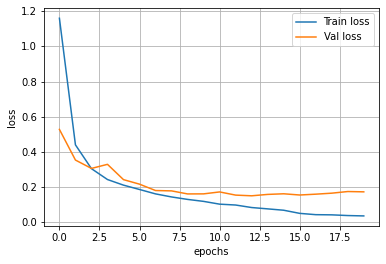

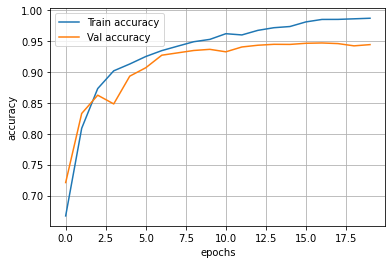

In [ ]:
# Train and Validation Loss Graph
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.grid()
plt.show()

# Train and Validation Accuracy Graph
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Metrics  --- Classification report and Confusion matrix
y_pred = model.predict(x_test)                    # --- Predicted values from the test data
y_pred = (y_pred >0.5)                            # --- Taking the highest probability value                
print(classification_report(y_test,y_pred))
print('Confusion Matrix')
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95      1748
         1.0       0.92      0.95      0.94      1252

    accuracy                           0.95      3000
   macro avg       0.94      0.95      0.94      3000
weighted avg       0.95      0.95      0.95      3000

Confusion Matrix
[[1647  101]
 [  62 1190]]


**Discriminator - 2**

In [ ]:
# Loading the attributes of face images (Train and Test) from csv file.
df2 = pd.read_csv('/content/drive/MyDrive/Biometric Project/biometric.csv')
df3 = pd.read_csv('/content/drive/MyDrive/Biometric Project/test_data.csv')

In [ ]:
# Selecting Smiling atrribute
df2[['image_id','Smiling']].head()

image_id  Smiling
0  000001.jpg        1
1  000002.jpg        1
2  000003.jpg       -1
3  000004.jpg       -1
4  000005.jpg       -1

In [ ]:
# Distribution of Smiling attribute (train)
df2['Smiling1'].value_counts()

0    10419
1     9590
Name: Smiling1, dtype: int64

In [ ]:
# Distribution of Smiling attribute (test)
df3['Smiling'].value_counts()

-1    1602
 1    1401
Name: Smiling, dtype: int64

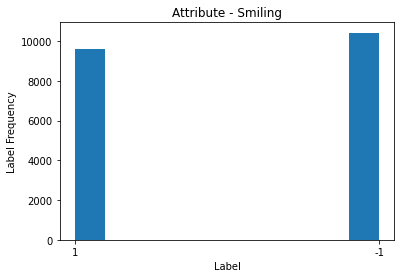

In [ ]:
# Visualization of Smiling attribute data distribution.
plt.hist(df['Smiling'], bins = 10)
plt.xlabel('Label')
plt.ylabel('Label Frequency')
plt.title('Attribute - Smiling')
plt.show()

In [ ]:
# Function returns 1 for smiling and 0 for not smiling.

def ext(x):
  if x == -1:
    return 0
  else:
    return x

df2['Smiling1'] = df2['Smiling'].apply(ext)
df3['Smiling1'] = df3['Smiling'].apply(ext)

In [ ]:
# Converting the data present in pandas series (data type) to numpy array.
y_smile = df2.loc[:,'Smiling1'].values
y_test_sm = df3.loc[:, 'Smiling1'].values

In [ ]:
# Train,Validation & test split of labels(smiling attribute)
y_train_sm = y_smile[:14007]
y_val_sm = y_smile[14007:20009]
y_test_sm = y_test_sm[:3000]

In [ ]:
# Size of train,validation & test data
print(y_train_sm.shape)
print(y_val_sm.shape)
print(y_test_sm.shape)

(14007,)
(6002,)
(3003,)


In [ ]:
#CNN Model
def my_cnn(ishape = (96,96,1), ndim = 1, lr = 1e-4):
  input_img  =  tf.keras.layers.Input(shape = ishape)
  l1         =  tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same')(input_img)
  l2         =  tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same')(l1)
  max1       =  tf.keras.layers.MaxPool2D((2,2))(l2)
  drop1       = tf.keras.layers.Dropout(0.5)(max1)
  l3         =  tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same')(drop1)
  l4         =  tf.keras.layers.Conv2D(256, (3,3), activation='relu', padding='same')(l3)
  max2       =  tf.keras.layers.MaxPool2D((2,2))(l4)
  flat       =  tf.keras.layers.Flatten()(max2)
  out        =  tf.keras.layers.Dense(ndim, activation='sigmoid')(flat)
  model1     =  tf.keras.models.Model(inputs = input_img, outputs = out)
  model1.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=lr), loss = 'binary_crossentropy', metrics = ['accuracy'])
  return model1

In [ ]:
# Model Summary
model1 = my_cnn()
print(model1.summary())

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 96, 96, 1)]       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 96, 96, 32)        320       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 96, 96, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 48, 48, 128)       73856     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 48, 48, 256)       2951

In [ ]:
# Call backs
model_name1 = "smile_model.h5"

early_stop1 = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 20)

model_check_point1 = tf.keras.callbacks.ModelCheckpoint(model_name1, monitor='val_loss', save_best_only=True, save_weights_only=True)

def scheduler(epoch, lr):
    if epoch%15==0:
      lr = lr/2
    return lr

lr_schedule1 = tf.keras.callbacks.LearningRateScheduler(scheduler,verbose = 0)

In [ ]:
# Model Training
history1 = model1.fit(x_train, y_train_sm, epochs = 25, callbacks = [early_stop1,model_check_point1,lr_schedule1], validation_data=(x_val,y_val_sm))

Epoch 1/25
438/438 [==============================] - 12s 26ms/step - loss: 3.1003 - accuracy: 0.4952 - val_loss: 0.7541 - val_accuracy: 0.5182
Epoch 2/25
438/438 [==============================] - 11s 25ms/step - loss: 0.9030 - accuracy: 0.5042 - val_loss: 0.7046 - val_accuracy: 0.5010
Epoch 3/25
438/438 [==============================] - 11s 25ms/step - loss: 0.7533 - accuracy: 0.5021 - val_loss: 0.7120 - val_accuracy: 0.4882
Epoch 4/25
438/438 [==============================] - 11s 25ms/step - loss: 0.7357 - accuracy: 0.5127 - val_loss: 0.6965 - val_accuracy: 0.5098
Epoch 5/25
438/438 [==============================] - 11s 25ms/step - loss: 0.7098 - accuracy: 0.5199 - val_loss: 0.7031 - val_accuracy: 0.4880
Epoch 6/25
438/438 [==============================] - 11s 25ms/step - loss: 0.6977 - accuracy: 0.5343 - val_loss: 0.6962 - val_accuracy: 0.5187
Epoch 7/25
438/438 [==============================] - 11s 25ms/step - loss: 0.6912 - accuracy: 0.5468 - val_loss: 0.6965 - val_accuracy:

In [ ]:
model1.load_weights(model_name1)        # --- Loading the best weights of the model acquired during training.
model1.evaluate(x_test, y_test_sm)      # --- Evaluating the model on test data.

94/94 [==============================] - 1s 7ms/step - loss: 0.6979 - accuracy: 0.5047


[0.6979385018348694, 0.5046666860580444]

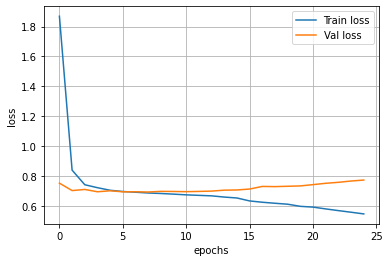

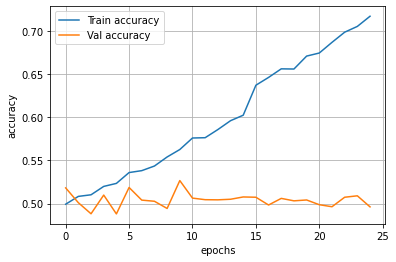

In [ ]:
# Train and Validation Loss Graph
plt.plot(history1.history['loss'], label='Train loss')
plt.plot(history1.history['val_loss'], label='Val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.grid()
plt.show()

# Train and Validation Accuracy Graph
plt.plot(history1.history['accuracy'], label='Train accuracy')
plt.plot(history1.history['val_accuracy'], label='Val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Metrics  --- Classification report and Confusion matrix
y_pred1 = model1.predict(x_test)                    # --- Predicted values from the test data
y_pred1 = (y_pred1 >0.5)                            # --- Taking the highest probability value                
print(classification_report(y_test_sm,y_pred1))
print('Confusion Matrix')
print(confusion_matrix(y_test_sm,y_pred1))

              precision    recall  f1-score   support

           0       0.53      0.60      0.56      1601
           1       0.46      0.40      0.43      1399

    accuracy                           0.50      3000
   macro avg       0.50      0.50      0.50      3000
weighted avg       0.50      0.50      0.50      3000

Confusion Matrix
[[959 642]
 [844 555]]
